IA & Data science -- 2017-2018
--------
*&copy; Equipe pédagogique: Ludovic Denoyer, Thibault Laugel, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander*

# TD-TME08: algorithme des k-moyennes

L'objectif de ce TP est d'implémenter un nouvel algorithme d'apprentissage non-supervisé, l'algorithme des K-moyennes (cours 9).

<font size="+1">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

ABBACHE Yahiathen, SAOUDAT Ahmed

## Questions de cours (à faire chez vous, sur papier)

Pour vous entraîner sans machine...

**[Q]** On considère un ensemble fini $U$ d'éléments. 
- donner la fonction caractéristique de $U$
- donner la fonction caractéristique de l'ensemble vide
- soit $E$ et $F$ deux sous-ensembles de $U$ définis par leurs fonctions caractéristiques $\chi_E$ et $\chi_F$. En déduire les fonctions caractéristiques de $E\cup F$, de $E\cap F$ et de $E^{c}$. *(indice: penser au min et au max)*

**[Q]** Rappeler la définition d'une partition $P$ d'un ensemble $X$ en $K$ sous-ensembles. 

**[Q]** Appliquer, à la main, l'algorithme des K-moyennes sur les données fournies sur le transparent 10 du cours 8 en utilisant d'abord $K=2$, puis $K=3$. Dans chacun des cas, réaliser au maximum 10 itérations de l'algorithme ($t_{max}=10$).
Comparer les résultats obtenus.


---

## Préparation

Décompresser l'archive, elle crée le répertoire "tp8" qui contient un fichier ipython à ouvrir (ce fichier-ci) et un sous-répertoire "data" contenant les bases d'apprentissage utilisées dans ce TP.

Le but de ce TP est de compléter ce document ipython en ajoutant les fonctions demandées. Avant de commencer, exécuter le bloc suivant afin de pouvoir initialiser des variables utiles 


In [3]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import math as m
%matplotlib inline  

### Chargement du fichier "base_2D.csv"

La lecture d'un fichier CSV par <code>pd.read()</code> fournit un DataFrame que vous avez appris à manipuler dans le TP02.

In [4]:
data_2D = pd.read_csv("data/base-2D.csv")
data_2D[0:5]  # ou bien: data_2D[0:len(data_2D)]

,X,Y
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0


Dans la suite de ce TP, il est conseillé de travailler sur des données de type DataFrame le plus souvent possible.

**Important**: dans la suite de ce TP, on appelle:

- "base d'apprentissage" le DataFrame contenant l'ensemble des exemples d'apprentissage chargés par la commande précédente
- "base d'exemples" : un DataFrame contenant un ensemble d'exemples (remarque: la base d'apprentissage est le plus grand ensemble d'exemples possible)

### Récupération des fonctions utiles

**[Q]** Réécrire la fonction <code>normalisation()</code> du TD-TME07: cette fonction doit prendre en argument un <code>DataFrame DF</code> et rendre **le dataframe** obtenu en normalisant chaque colonne de <code>DF</code> par la méthode vue en cours 8.

In [5]:
def normalisation(dataFrame):
    
    data=dataFrame.as_matrix()
    for i in range(data.shape[1]):
        minCur=data[:,i].min()
        maxCur=data[:,i].max()
        
        data[:,i]=(data[:,i]-minCur)/(maxCur-minCur)
         
    return dataFrame

---> type de DataFnorm: <class 'pandas.core.frame.DataFrame'>


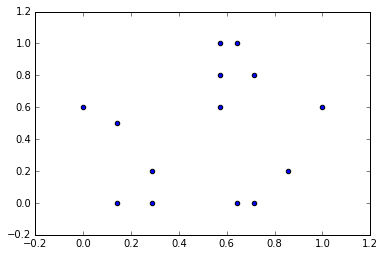

In [6]:
# Affichage des points après normalisation:

DataFnorm = normalisation(data_2D)
print("---> type de DataFnorm:",type(DataFnorm))

plt.scatter(DataFnorm['X'],DataFnorm['Y'])


Avec un dataframe, il est facile d'accéder à tous les éléments d'une colonne, par exemple '<code>DFnorm['X']</code> permet de récupérer une <code>Series</code> contenant toutes les lignes de la colonne de nom 'X'.
On peut accéder à une ligne (ou un ensemble de ligne) très facilement:
- <code>DFnorm.iloc[0]</code> permet de récupérer la ligne d'indice 0 sous la forme d'une "series"
- <code>DFnorm.iloc[0:1]</code> permet de récupérer la ligne d'indice 0 sous la forme d'un dataframe (cettte instruction réalise un "slicing")
- <code>DFnorm.iloc[0:5]</code> permet de récupérer les lignes d'indice de 0 à 4

etc.

In [7]:
print(type(DataFnorm.iloc[0]))
print("new:",type(DataFnorm.iloc[0]))
print("new:",type(DataFnorm.iloc[0:1]))
print(DataFnorm.iloc[0])


<class 'pandas.core.series.Series'>
new: <class 'pandas.core.series.Series'>
new: <class 'pandas.core.frame.DataFrame'>
X    0.0
Y    0.6
Name: 0, dtype: float64


**[Q]** Réécrire la fonction <code>dist_vect()</code> qui calcule la distance euclidienne entre deux <code>Series</code>.

In [8]:
def dist_vect(x,y):
    ret=0
    for i in range(len(x)):
        ret+=(x[i]-y[i])**2
    return m.sqrt(ret)

In [9]:
dist_vect(DataFnorm.iloc[0],DataFnorm.iloc[7])

0.6975174637562116

### Calcul de centroides

**[Q]** Ecrire la fonction <code>centroide()</code> qui, étant donné un DataFrame représentant plusieurs exemples rend le centroide. Cette fonction doit rendre un DataFrame.

In [10]:
def centroide(dataFrame):
    return dataFrame.mean()
    
    

In [11]:
centroide(DataFnorm)
#for i in range(len(DataFnorm.axes[0])):
#    print(DataFnorm.iloc[i])


X    0.510204
Y    0.450000
dtype: float64

## Travail à réaliser

### Inertie d'un cluster
**[Q]** Ecrire la fonction <code>inertie_cluster</code> qui, étant donné un DataFrame contenant un ensemble d'exemples, rend la valeur de l'inertie de cet ensemble telle qu'elle a été définie dans le cours.

In [12]:
def inertie_cluster(dataFrame):
    c=centroide(dataFrame)
    s=0
    
    for i in range(len(dataFrame.axes[0])):
        s+=m.pow(dist_vect(dataFrame.iloc[i],c),2)
    return s

In [13]:
print("inertie :",inertie_cluster(DataFnorm))

inertie : 2.975991253644316


Dans ce qui suit, on appelle "ensemble de centroides" un DataFrame contenant $K$ vecteurs de dimensions $p$.

**[Q]** Ecrire la fonction <code>initialisation()</code> qui étant donné un entier $K>1$ et une base d'apprentissage (sous la forme d'un DataFrame) de $n$ exemples rend un DataFrame contenant $K$ exemples tirés aléatoirement dans la base.
On fait l'hypothèse que $K\leq n$.

*Remarque*: étudier les fonctions de la librairie random de Python...


In [14]:
def initialisation(K,dataFrame):
    return dataFrame.sample(n=K)
    
    

In [15]:
# Par exemple (mais vous ne devriez pas pouvoir retrouver exactement les mêmes !)
Centroides_test = initialisation(3,DataFnorm)
Centroides_test

,X,Y
5,0.571429,0.6
9,0.642857,1.0
2,0.142857,0.0


En utilisant l'option <code>"color='blue'"</code> ou <code>"color='red'"</code> de la fonction <code>scatter()<code>, on peut réaliser l'affichage de la base d'apprentissage (en bleu) et des centroides initiaux (en rouge).

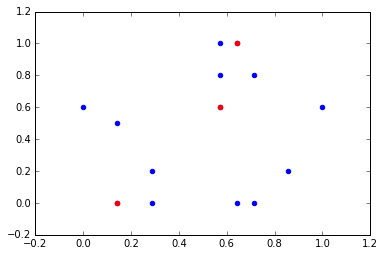

In [16]:
plt.scatter(DataFnorm['X'],DataFnorm['Y'],color='blue')

plt.scatter(Centroides_test['X'],Centroides_test['Y'],color='red')

**[Q]** Ecrire la fonction <code>plus_proche()</code> qui, étant donné un exemple et un DataFrame contenant un ensemble de centroides, rend l'indice (dans le DataFrame) du centroide dont l'exemple est le plus proche.
En cas d'égalité de distance, le centroide de plus petit indice est choisi.

In [17]:
def plus_proche(exemple,df_centroide):
    
    dmin=10000000.
    indMin=-1
    dcur=0
    for i in range(len(df_centroide.axes[0])):
        dcur=dist_vect(df_centroide.iloc[i],exemple)
        if dcur < dmin:
            dmin=dcur
            indMin=i
    return indMin
    
    

In [18]:
test=pd.DataFrame([[0.714286,0.8],[0.714286,0.0],[0.571429,0.8]],[11,10,6],["X","Y"])

In [19]:
for i in range(0,len(DataFnorm)):
    pproche = plus_proche(DataFnorm.iloc[i],Centroides_test)
    print("Exemple ",i,": (",DataFnorm.iloc[i]['X'],", ",DataFnorm.iloc[i]['Y'], ")",\
          "est plus proche du centroide",pproche, ": (",Centroides_test.iloc[pproche]['X'],", ", \
          Centroides_test.iloc[pproche]['Y'],")")

Exemple  0 : ( 0.0 ,  0.6 ) est plus proche du centroide 0 : ( 0.5714285714285714 ,  0.6 )
Exemple  1 : ( 0.14285714285714285 ,  0.5 ) est plus proche du centroide 0 : ( 0.5714285714285714 ,  0.6 )
Exemple  2 : ( 0.14285714285714285 ,  0.0 ) est plus proche du centroide 2 : ( 0.14285714285714285 ,  0.0 )
Exemple  3 : ( 0.2857142857142857 ,  0.0 ) est plus proche du centroide 2 : ( 0.14285714285714285 ,  0.0 )
Exemple  4 : ( 0.2857142857142857 ,  0.2 ) est plus proche du centroide 2 : ( 0.14285714285714285 ,  0.0 )
Exemple  5 : ( 0.5714285714285714 ,  0.6 ) est plus proche du centroide 0 : ( 0.5714285714285714 ,  0.6 )
Exemple  6 : ( 0.5714285714285714 ,  0.8 ) est plus proche du centroide 0 : ( 0.5714285714285714 ,  0.6 )
Exemple  7 : ( 0.5714285714285714 ,  1.0 ) est plus proche du centroide 1 : ( 0.6428571428571429 ,  1.0 )
Exemple  8 : ( 0.6428571428571429 ,  0.0 ) est plus proche du centroide 2 : ( 0.14285714285714285 ,  0.0 )
Exemple  9 : ( 0.6428571428571429 ,  1.0 ) est plus pro

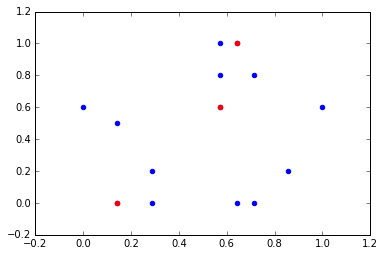

In [20]:
plt.scatter(DataFnorm['X'],DataFnorm['Y'],color='blue')

plt.scatter(Centroides_test['X'],Centroides_test['Y'],color='red')

### Matrice d'affectation

Etant donné une base d'apprentissage, on peut représenter une partition de cette base en K clusters à l'aide d'une matrice U contenant n lignes (une par exemple) et K colonnes (une par cluster) telle que 
- U[i,j] = 1 si l'exemple i appartient au cluster j
- U[i,j] = 0 si l'exemple i n'appartient pas au cluster j
- un exemple appartient à un et un seul cluster
- un cluster contient au moins un exemple

On appelle **matrice d'affectation** une telle matrice U.


#### Question 2
**[Q]** Donner une expression mathématique (pas du Python) des 2 dernières contraintes que vérifie une matrice d'affectation.

In [21]:
%%latex 
\begin{align}


1)\forall (i_{1},i_{2}) \in N^{2},\forall j \in K \quad (U[i_{1},j] = U[i_{2},j] \Rightarrow i_{1} = i_{2})
\newline 
2) \forall j \in K, \exists i \in N \quad U[i,j]=1


\end{align}

<IPython.core.display.Latex object>

#### Implémentation en Python
Dans ce TP, nous utilisons un dictionnaire pour représenter d'une matrice d'affectation: 
- les clés de ce dictionnaire correspondent aux K indices des clusters
- les valeurs correspondent à des listes d'indices d'exemples (leur indice dans la base d'apprentissage)

Dans tout ce qui suit, une "matrice d'affectation" sera un tel dictionnaire.


**[Q]** Ecrire la fonction <code>affecte_cluster()</code> qui, étant donné une base d'apprentissage et un ensemble de centroïdes, rend la matrice d'affectation des exemples de la base aux clusters représentés par chaque centroïde.

In [22]:
def affecte_cluster(dataFram, df_centroide):
    # les clés sont les K indices des clusters
    # les values == listes d'indices d'exemples (dans la base) 
    
    dic=dict()
    for i in range(len(dataFram.axes[0])):
        nearestK=plus_proche(dataFram.iloc[i],df_centroide)
        if nearestK in dic.keys():
            dic[nearestK].append(i)
        else:
            dic[nearestK]=[i]
        
    return dic

In [23]:
DictAffect = affecte_cluster(DataFnorm, Centroides_test)
DictAffect

{0: [0, 1, 5, 6, 12, 13], 1: [7, 9, 11], 2: [2, 3, 4, 8, 10]}

### Ensemble des centroides
Grâce à la matrice d'affectation, on peut maintenant trouver les nouveaux centroides. Ceux-ci sont déterminés en prenant les moyennes des ensembles des exemples qui sont affectés au même cluster.

**[Q]** Ecrire la fonction <code>nouveaux_centroides()</code> qui, étant donné une base d'apprentissage et une matrice d'affectation, rend l'ensemble des nouveaux centroides obtenus.

In [24]:
def nouveaux_centroides(dataForm, dic):
    res={}
    for k in dic.keys():
        res[k]=centroide(dataForm.iloc[dic[k]])
    res=pd.DataFrame(res)
    return res.transpose()


In [25]:
nouveaux_centroides(DataFnorm, DictAffect)

,X,Y
0,0.523810,0.550000
1,0.642857,0.933333
2,0.414286,0.040000


### Inertie globale d'une partition

**[Q]** En utilisant la fonction <code>inertie_cluster()</code>, écrire la fonction <code>inertie_globale()</code> qui, étant donné une base d'apprentissage et une matrice d'affectation, rend la valeur de l'inertie globale du partitionnement correspondant.


In [26]:
def inertie_globale(dataF,dictAffect):
    res=0
    
    for k in dictAffect.keys():
        res+=inertie_cluster(dataF.iloc[dictAffect[k]])
    return res
    
    

In [27]:
inertie_globale(DataFnorm,DictAffect)

1.2747551020408163

### Algorithme des K-moyennes

**[Q]** En utilisant les fonctions précédentes, implémenter l'algorithme des K-moyennes.
Pour cela, écrire une fonction <code>kmoyennes()</code> qui prend en argument un entier $K>1$, une base d'apprentissage, ainsi que deux nombres: un réel *epsilon*$>0$ et un entier *iter_max*$>1$, et qui rend un ensemble de centroides et une matrice d'affectation.

Le réel *epsilon* servira de critère de convergence, et l'entier *iter_max* sera utilisé pour fixer un nombre d'itérations maximale servant à arrêter le calcul.

In [56]:
def kmoyennes(K, data, epsilon, iter_max):
    K_cenroides=initialisation(K,data)
    old_inertie=0
    i=0
    while(i<iter_max):
        #print(i)
        dic_affect=affecte_cluster(data, K_cenroides)
        K_cenroides=nouveaux_centroides(data,dic_affect)
        
        new_inertie=inertie_globale(data,dic_affect)
        #print(new_inertie, " old=", old_inertie)
        diff_inert = m.fabs( new_inertie - old_inertie)
        print ("Iteration ", i+1, "\tInertie: ", new_inertie, "\tDifference: ", diff_inert)
        if(m.fabs( new_inertie - old_inertie) < epsilon):
            return K_cenroides,dic_affect
        old_inertie=new_inertie
        i+=1
    print("Iertations_max atteint\n") 
    return K_cenroides,dic_affect
    

In [57]:
les_centres, l_affectation = kmoyennes(2, DataFnorm, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

Iteration  1 	Inertie:  1.6188338192419824 	Difference:  1.6188338192419824
Iteration  2 	Inertie:  1.4279421768707483 	Difference:  0.19089164237123413
Iteration  3 	Inertie:  1.4279421768707483 	Difference:  0.0
Affichage des centres:            X         Y
0  0.526786  0.737500
1  0.488095  0.066667
Affichage des affectations:  {0: [0, 1, 5, 6, 7, 9, 11, 13], 1: [2, 3, 4, 8, 10, 12]}


In [58]:
les_centres, l_affectation = kmoyennes(3, DataFnorm, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

Iteration  1 	Inertie:  1.2269727891156463 	Difference:  1.2269727891156463
Iteration  2 	Inertie:  1.1791904761904763 	Difference:  0.04778231292516999
Affichage des centres:            X         Y
0  0.488095  0.066667
1  0.642857  0.933333
2  0.457143  0.620000
Affichage des affectations:  {0: [2, 3, 4, 8, 10, 12], 1: [7, 9, 11], 2: [0, 1, 5, 6, 13]}


On peut réaliser un affichage couleur des centroïdes trouvés:

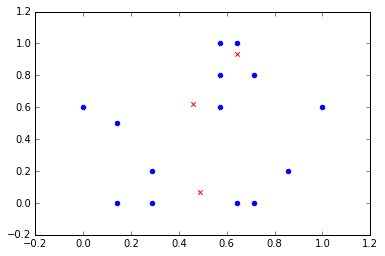

In [59]:
plt.scatter(DataFnorm['X'],DataFnorm['Y'],color='b')
plt.scatter(les_centres['X'],les_centres['Y'],color='r',marker='x')

In [60]:
print(DataFnorm.iloc[[1,2,4]]["X"])
print(l_affectation[0])

1    0.142857
2    0.142857
4    0.285714
Name: X, dtype: float64
[2, 3, 4, 8, 10, 12]


**[Q]** Ecrire la fonction <code>affiche_resultat()</code> qui permet d'afficher le résultat de l'algorithme en utilisant des couleurs différentes pour les clusters trouvés (pour faire simple, on peut ne considèrer que le cas où K vaut 3).

*Remarque*: La librairie matplotlib permet de manipuler aisément des couleurs:
http://matplotlib.org/api/cm_api.html

In [61]:
def affiche_resultat(data, centers, affectation):
    
    plt.scatter(data.iloc[affectation[0]]['X'],data.iloc[affectation[0]]['Y'],color='g')
    plt.scatter(data.iloc[affectation[1]]['X'],data.iloc[affectation[1]]['Y'],color='b')
    plt.scatter(data.iloc[affectation[2]]['X'],data.iloc[affectation[2]]['Y'],color='y')
    
    plt.scatter(centers['X'],centers['Y'],color='r',marker='x')
    

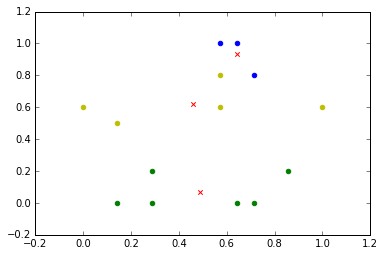

In [62]:
affiche_resultat(DataFnorm,les_centres,l_affectation)

### Expérimentations

**[Q]** Expérimenter l'algorithme des k-moyennes sur les données. Etudier l'impact du choix de $K$ sur l'inertie globale finale. Faire de même en relançant plusieurs fois l'algorithme avec la même valeur de $K$, en modifiant la valeur de epsilon ou de max_iter, etc.

Iteration  1 	Inertie:  1.4718950437317784 	Difference:  1.4718950437317784
Iteration  2 	Inertie:  1.4718950437317784 	Difference:  0.0
Iteration  1 	Inertie:  0.7199251700680271 	Difference:  0.7199251700680271
Iteration  2 	Inertie:  0.7199251700680271 	Difference:  0.0
Iteration  1 	Inertie:  0.609278911564626 	Difference:  0.609278911564626
Iteration  2 	Inertie:  0.609278911564626 	Difference:  0.0
Iteration  1 	Inertie:  0.36671088435374155 	Difference:  0.36671088435374155
Iteration  2 	Inertie:  0.23427891156462588 	Difference:  0.13243197278911567
Iteration  3 	Inertie:  0.23427891156462588 	Difference:  0.0
Iteration  1 	Inertie:  0.4421700680272108 	Difference:  0.4421700680272108
Iteration  2 	Inertie:  0.4421700680272108 	Difference:  0.0
Iteration  1 	Inertie:  0.23547619047619056 	Difference:  0.23547619047619056
Iteration  2 	Inertie:  0.23547619047619056 	Difference:  0.0
Iteration  1 	Inertie:  0.1147108843537415 	Difference:  0.1147108843537415
Iteration  2 	Inertie

TypeError: float() argument must be a string or a number, not 'dict_keys'

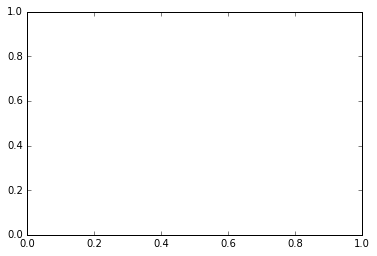

In [63]:
K_max=len(DataFnorm.index)
it_max=100
epsilon=0.05

res={}
for i in range(2,K_max,1):
    cen,aff=kmoyennes(i,DataFnorm,epsilon, it_max)
    res[i]=inertie_globale(DataFnorm,aff)

plt.plot(res.keys(), res.values())
plt.title("inertie globale en fonction de du nombre de Kluster")
plt.xlabel("K")
plt.ylabel("inertie globale")

Iteration  1 	Inertie:  0.22568027210884362 	Difference:  0.22568027210884362
Iteration  2 	Inertie:  0.22568027210884362 	Difference:  0.0
Iteration  3 	Inertie:  0.22568027210884362 	Difference:  0.0
Iteration  4 	Inertie:  0.22568027210884362 	Difference:  0.0
Iteration  5 	Inertie:  0.22568027210884362 	Difference:  0.0
Iteration  6 	Inertie:  0.22568027210884362 	Difference:  0.0
Iteration  7 	Inertie:  0.22568027210884362 	Difference:  0.0
Iteration  8 	Inertie:  0.22568027210884362 	Difference:  0.0
Iteration  9 	Inertie:  0.22568027210884362 	Difference:  0.0
Iteration  10 	Inertie:  0.22568027210884362 	Difference:  0.0
Iteration  11 	Inertie:  0.22568027210884362 	Difference:  0.0
Iteration  12 	Inertie:  0.22568027210884362 	Difference:  0.0
Iteration  13 	Inertie:  0.22568027210884362 	Difference:  0.0
Iteration  14 	Inertie:  0.22568027210884362 	Difference:  0.0
Iteration  15 	Inertie:  0.22568027210884362 	Difference:  0.0
Iteration  16 	Inertie:  0.22568027210884362 	Di

TypeError: float() argument must be a string or a number, not 'dict_keys'

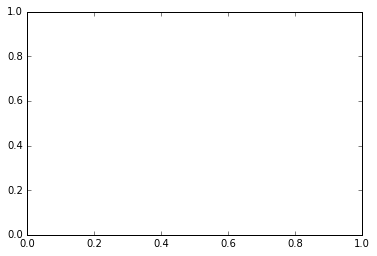

In [64]:
k_opt=7
epsilons=[0,0.00001,0.0001,0.002,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
it_max=100

res={}
for i in epsilons:
    cen,aff=kmoyennes(k_opt,DataFnorm,i, it_max)
    res[i]=inertie_globale(DataFnorm,aff)

plt.plot(res.keys(), res.values())
plt.title("inertie globale en fonction de epsilon")
plt.xlabel("epsilon")
plt.ylabel("inertie globale")



In [ ]:
k_opt=7
epsilon_opt=0.001
it_max=500

res={}
for i in range(2,503,100):
    cen,aff=kmoyennes(k_opt,DataFnorm,epsilon_opt, i)
    res[i]=inertie_globale(DataFnorm,aff)

plt.plot(res.keys(), res.values())
plt.title("inertie globale en fonction de itera_max, epsilon=0.001")
plt.xlabel("iter_max")
plt.ylabel("inertie globale")



## Application à des données réelles

- Appliquer l'algorithme aux données concernant les déchets de la ville de Paris (qui sont fournies dans le répertoire data)
- Trouver des bases d'apprentissage intéressantes sur http://opendata.paris.fr/


Dans les 2 cas, étudier la base et les clusters qui peuvent être mis en évidence. En particulier, regarder la variation de l'inertie globale des clusters obtenus en fonction de la valeur de $K$ choisie.


**Attention**: il faudra certainement préparer cette base afin de pouvoir appliquer l'algorithme de clustering: en particulier, certaines colonnes (Granularité, Total...) ne sont pas à utilisables dans le calcul des distances, il faudra donc les éliminer. Il faut aussi prévoir de conserver le nom de l'arrondissement afin de pouvoir à la fin analyser le résultat du clustering.

In [181]:
data_Paris = pd.read_csv("data/base-Paris.csv",sep=";")

In [182]:
data_Paris.head(-1)

,Granularité,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11,Totalarrondissement2011
0,75007,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1,NaN
1,75013,596.5,540.2,618.5,558.6,595.9,581.7,539.2,490.5,597.8,575.7,580.5,601.4,NaN
2,75014,464.0,404.9,465.3,420.2,405.3,446.0,412.9,348.7,449.3,446.3,453.1,484.3,NaN
3,75015,903.1,801.4,937.5,835.5,876.8,888.6,628.8,674.8,913.3,878.7,895.7,935.8,NaN
4,75017,451.1,412.4,491.6,422.7,363.6,446.4,409.5,332.3,416.4,451.5,475.1,513.5,NaN
5,75018,427.0,394.3,455.2,419.9,458.3,456.6,418.0,361.8,464.6,453.4,478.5,470.9,NaN
6,75019,323.4,287.3,350.3,317.8,336.9,340.7,311.6,281.0,345.6,335.6,367.0,354.5,NaN
7,75002,153.0,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8,NaN
8,75004,116.3,115.7,133.4,115.0,123.2,120.5,114.5,97.6,130.5,123.0,124.3,133.7,NaN
9,75008,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4,NaN


In [183]:
arrondi=data_Paris[["Granularité"]]
data_Paris=data_Paris.drop(["Granularité","Totalarrondissement2011"], axis=1)
print(arrondi)
data_Paris.head(-1)


   Granularité
0        75007
1        75013
2        75014
3        75015
4        75017
5        75018
6        75019
7        75002
8        75004
9        75008
10       75012
11       75016
12       75020
13   ToutParis
14       75001
15       75005
16       75006
17       75010
18       75011
19       75003
20       75009


,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11
0,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1
1,596.5,540.2,618.5,558.6,595.9,581.7,539.2,490.5,597.8,575.7,580.5,601.4
2,464.0,404.9,465.3,420.2,405.3,446.0,412.9,348.7,449.3,446.3,453.1,484.3
3,903.1,801.4,937.5,835.5,876.8,888.6,628.8,674.8,913.3,878.7,895.7,935.8
4,451.1,412.4,491.6,422.7,363.6,446.4,409.5,332.3,416.4,451.5,475.1,513.5
5,427.0,394.3,455.2,419.9,458.3,456.6,418.0,361.8,464.6,453.4,478.5,470.9
6,323.4,287.3,350.3,317.8,336.9,340.7,311.6,281.0,345.6,335.6,367.0,354.5
7,153.0,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8
8,116.3,115.7,133.4,115.0,123.2,120.5,114.5,97.6,130.5,123.0,124.3,133.7
9,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4


In [189]:
data_Paris=data_Paris.astype(float)
data_Paris

,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11
0,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1
1,596.5,540.2,618.5,558.6,595.9,581.7,539.2,490.5,597.8,575.7,580.5,601.4
2,464.0,404.9,465.3,420.2,405.3,446.0,412.9,348.7,449.3,446.3,453.1,484.3
3,903.1,801.4,937.5,835.5,876.8,888.6,628.8,674.8,913.3,878.7,895.7,935.8
4,451.1,412.4,491.6,422.7,363.6,446.4,409.5,332.3,416.4,451.5,475.1,513.5
5,427.0,394.3,455.2,419.9,458.3,456.6,418.0,361.8,464.6,453.4,478.5,470.9
6,323.4,287.3,350.3,317.8,336.9,340.7,311.6,281.0,345.6,335.6,367.0,354.5
7,153.0,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8
8,116.3,115.7,133.4,115.0,123.2,120.5,114.5,97.6,130.5,123.0,124.3,133.7
9,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4


In [65]:
itera=100
epsi=0.1
K=[i for i in range(2,data_Paris.shape[0])]

r={}
for k in K:
    cen,aff=kmoyennes(k,data_Paris,epsi,itera)
    r[k]=inertie_globale(data_Paris,aff)
plt.xlabel("K")
plt.ylabel("inertie")
plt.title("inertie en fonction de k nombre de kluster")
plt.plot(r.keys(),r.values())

NameError: name 'data_Paris' is not defined